In [1]:
input_path = '/home/doantientai/Projects/DeepRoot/root-unet/Experiments/root_64_rgb/TestResults/root_64_rgb_1_predict.png'

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import numpy as np
%matplotlib inline
import scipy.ndimage
import cv2

from skimage import morphology

# input: grayscale predicted image
# convert to binary, invert
# remove small objects

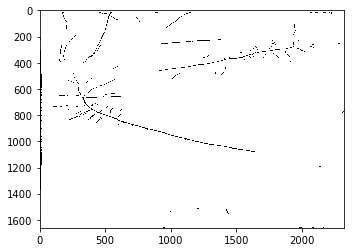

In [21]:
# im = Image.open(input_path)
im = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
# imshow(np.asarray(im),cmap="gray")
# imsave(im, "img_gray.png")

im_bin = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,31,2)
cv2.imwrite("im_bin.png", im_bin)

im_inv = cv2.bitwise_not(im_bin)
cv2.imwrite("im_inv.png", im_inv)

kernel_erode = np.ones((2,2),np.uint8)
im_ero = cv2.erode(im_inv,kernel_erode,iterations = 1)
cv2.imwrite('im_ero.png', im_ero)

kernel_close = np.ones((5,5),np.uint8)
im_close = closing = cv2.morphologyEx(im_ero, cv2.MORPH_CLOSE, kernel_close)
cv2.imwrite('im_close.png', im_close)

im_dn = morphology.remove_small_objects(im_close.astype('bool'),64)
im_dn = np.array(im_dn, dtype=np.uint8)

kernel_close = np.ones((5,5),np.uint8)
im_dn = closing = cv2.morphologyEx(im_dn, cv2.MORPH_CLOSE, kernel_close)
cv2.imwrite('im_close.png', im_close)


im_dn*=255

cv2.imwrite('im_dn.png', im_dn)

im_dn_inv = cv2.bitwise_not(im_dn)
cv2.imwrite("im_dn_inv.png", im_dn_inv)

# print np.amax(im_dn.astype('uint8'))
imshow(im_dn,cmap='binary')

In [ ]:
kernel = np.ones((3,3),np.uint8)
im_ero = cv2.erode(im_inv,kernel,iterations = 1)
cv2.imwrite("im_ero.png", im_ero)

# kernel_close = np.ones((7,7),np.uint8)
# im_open = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel_close)
# cv2.imwrite("im_open.png", im_open)

# im_denoised = cv2.fastNlMeansDenoising(im_ero,None,10,7,21)

# cv2.imwrite("im_denoised.png", im_denoised)


# imshow(im_bin)
# im_bin
# im_bin

In [ ]:
img_test = np.array([[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,1,0]])

img_test = img_test.astype(bool)

img_test_removed = morphology.remove_small_objects(img_test,3)

img_test_removed.astype(int)